In [11]:
from Bio import SeqIO
from Bio.Seq import Seq
import numpy as np
from collections import Counter
import itertools

In [60]:
codontab = {
    'TCA': 'S',    # Serina
    'TCC': 'S',    # Serina
    'TCG': 'S',    # Serina
    'TCT': 'S',    # Serina
    'TTC': 'F',    # Fenilalanina
    'TTT': 'F',    # Fenilalanina
    'TTA': 'L',    # Leucina
    'TTG': 'L',    # Leucina
    'TAC': 'Y',    # Tirosina
    'TAT': 'Y',    # Tirosina
    'TAA': '*',    # Stop
    'TAG': '*',    # Stop
    'TGC': 'C',    # Cisteina
    'TGT': 'C',    # Cisteina
    'TGA': '*',    # Stop
    'TGG': 'W',    # Triptofano
    'CTA': 'L',    # Leucina
    'CTC': 'L',    # Leucina
    'CTG': 'L',    # Leucina
    'CTT': 'L',    # Leucina
    'CCA': 'P',    # Prolina
    'CCC': 'P',    # Prolina
    'CCG': 'P',    # Prolina
    'CCT': 'P',    # Prolina
    'CAC': 'H',    # Histidina
    'CAT': 'H',    # Histidina
    'CAA': 'Q',    # Glutamina
    'CAG': 'Q',    # Glutamina
    'CGA': 'R',    # Arginina
    'CGC': 'R',    # Arginina
    'CGG': 'R',    # Arginina
    'CGT': 'R',    # Arginina
    'ATA': 'I',    # Isoleucina
    'ATC': 'I',    # Isoleucina
    'ATT': 'I',    # Isoleucina
    'ATG': 'M',    # Methionina
    'ACA': 'T',    # Treonina
    'ACC': 'T',    # Treonina
    'ACG': 'T',    # Treonina
    'ACT': 'T',    # Treonina
    'AAC': 'N',    # Asparagina
    'AAT': 'N',    # Asparagina
    'AAA': 'K',    # Lisina
    'AAG': 'K',    # Lisina
    'AGC': 'S',    # Serina
    'AGT': 'S',    # Serina
    'AGA': 'R',    # Arginina
    'AGG': 'R',    # Arginina
    'GTA': 'V',    # Valina
    'GTC': 'V',    # Valina
    'GTG': 'V',    # Valina
    'GTT': 'V',    # Valina
    'GCA': 'A',    # Alanina
    'GCC': 'A',    # Alanina
    'GCG': 'A',    # Alanina
    'GCT': 'A',    # Alanina
    'GAC': 'D',    # Acido Aspartico
    'GAT': 'D',    # Acido Aspartico
    'GAA': 'E',    # Acido Glutamico
    'GAG': 'E',    # Acido Glutamico
    'GGA': 'G',    # Glicina
    'GGC': 'G',    # Glicina
    'GGG': 'G',    # Glicina
    'GGT': 'G'     # Glicina
}

In [13]:
def read_fasta(file):
    sequences = []
    for record in SeqIO.parse(file, "fasta"):
        sequences.append(str(record.seq))
    return sequences

In [29]:
def reverse_complement(seq):
    complement = {'A': 'T', 'T': 'A', 'C': 'G', 'G': 'C'}
    reverse_seq = ''.join([complement[base] for base in reversed(seq)])
    return reverse_seq

In [45]:
def generate_frames(seq):
    frame1 = seq
    frame2 = seq[1:]
    frame3 = seq[2:]

    rev_comp_seq = reverse_complement(seq)
    frame4 = rev_comp_seq
    frame5 = rev_comp_seq[1:]
    frame6 = rev_comp_seq[2:]

    return [frame1, frame2, frame3, frame4, frame5, frame6]


In [52]:
def split_into_codons(frames):
    frames_in_codons = []
    for frame in frames:
        codons = [frame[i:i+3] for i in range(0, len(frame), 3)]
        codons = [codon for codon in codons if len(codon) == 3] # išmetame nepilnus kodonus
        frames_in_codons.append(codons)
    return frames_in_codons

In [61]:
def translate_frames(frames):
    translated_frames = []
    for frame in frames:
        translated_frame = []
        for codon in frame:
          if codon in codontab:
            translated_frame.append(codontab[codon])
        translated_frames.append(translated_frame)
    return translated_frames


In [93]:
def find_protein_sequences(frame):
    protein_sequences = []
    protein_start_codons = ['M']
    protein_stop_codons = ['*']

    protein_start = -1
    for i in range(0, len(frame)):
        if frame[i] in protein_start_codons and protein_start == -1:
            protein_start = i
        elif frame[i] in protein_stop_codons and protein_start != -1:
            if len(frame[protein_start : i+1]) >= 33:
                protein_sequences.append(frame[protein_start+1 : i])
            protein_start = -1
    return protein_sequences

In [88]:
def amino_acid_frequency(frames, protein_sequences):
    # Apskaičiuojame kiek viso kartojasi aminorūgštys
    amino_acid_counts = {}
    for frame in frames:
        for amino_acid in frame:
            if amino_acid in codontab.values():
                if amino_acid not in amino_acid_counts:
                    amino_acid_counts[amino_acid] = 0
                amino_acid_counts[amino_acid] += 1

    # Apskaičiuojame kiek baltymų sekose kartojasi aminorūgštys
    protein_amino_acid_counts = {}
    for protein_sequence in protein_sequences:
        for amino_acid in protein_sequence:
            if amino_acid in codontab.values():
                if amino_acid not in protein_amino_acid_counts:
                    protein_amino_acid_counts[amino_acid] = 0
                protein_amino_acid_counts[amino_acid] += 1

    # Gauname aminorūgščių pasikartojimo dažnį baltymų sekose
    amino_acid_frequencies = {}
    for amino_acid in amino_acid_counts:
        if amino_acid in protein_amino_acid_counts:
            amino_acid_frequencies[amino_acid] = protein_amino_acid_counts[amino_acid] / amino_acid_counts[amino_acid]
        else:
            amino_acid_frequencies[amino_acid] = 0

    return amino_acid_frequencies


In [83]:
def main(file):
    sequences = read_fasta(file)
    frames = generate_frames(sequences[0])
    split_frames = split_into_codons(frames)
    translated_frames = translate_frames(split_frames)

    all_protein_sequences = []
    for frame in translated_frames:
      protein_sequences = find_protein_sequences(frame)
      all_protein_sequences.extend(protein_sequences)

    frequencies = amino_acid_frequency(translated_frames, all_protein_sequences)

    return split_frames, translated_frames, all_protein_sequences, frequencies

In [94]:
bacterial1_split, bacterial1_translated, bacterial1_protein, bacterial1_frequency = main('/content/bacterial1.fasta')
bacterial2_split, bacterial2_translated, bacterial2_protein, bacterial2_frequency = main('/content/bacterial2.fasta')
bacterial3_split, bacterial3_translated, bacterial3_protein, bacterial3_frequency = main('/content/bacterial3.fasta')
bacterial4_split, bacterial4_translated, bacterial4_protein, bacterial4_frequency = main('/content/bacterial4.fasta')

mamalian1_split, mamalian1_translated, mamalian1_protein, mamalian1_frequency = main('/content/mamalian1.fasta')
mamalian2_split, mamalian2_translated, mamalian2_protein, mamalian2_frequency = main('/content/mamalian2.fasta')
mamalian3_split, mamalian3_translated, mamalian3_protein, mamalian3_frequency = main('/content/mamalian3.fasta')
mamalian4_split, mamalian4_translated, mamalian4_protein, mamalian4_frequency = main('/content/mamalian4.fasta')

In [115]:
import numpy as np
import itertools

frequency_dicts = {
    'bacterial1': bacterial1_frequency,
    'bacterial2': bacterial2_frequency,
    'bacterial3': bacterial3_frequency,
    'bacterial4': bacterial4_frequency,
    'mamalian1': mamalian1_frequency,
    'mamalian2': mamalian2_frequency,
    'mamalian3': mamalian3_frequency,
    'mamalian4': mamalian4_frequency
}

# Iš visų žodynų ištraukiame unikalų amino rūgščių sąrašą
all_amino_acids = set()
for freq in frequency_dicts.values():
    all_amino_acids.update(freq.keys())
all_amino_acids = sorted(all_amino_acids)

In [114]:
# Sukuriame pavadinimų sąrašą
labels = list(frequency_dicts.keys())

# Sukuriame matricą
frequency_matrix = []
for label in labels:
    freq = frequency_dicts[label]
    vector = [freq.get(aa, 0) for aa in all_amino_acids]
    frequency_matrix.append(vector)

frequency_matrix = np.array(frequency_matrix)

In [117]:
from scipy.spatial.distance import pdist, squareform

def compute_distance_matrix(matrix, method='euclidean'):
    distances = pdist(matrix, metric=method)
    distance_matrix = squareform(distances)
    return distance_matrix

# Skaičiuojame atstumus
distance_matrix = compute_distance_matrix(frequency_matrix, method='euclidean')

In [119]:
def write_phylip(distance_matrix, labels, output_file):

    n = len(labels)
    with open(output_file, 'w') as f:
        f.write(f"{n}\n")
        for i in range(n):
            label = labels[i]
            # Truncate or pad label to 10 characters as per Phylip format
            label = label.ljust(10)[:10]
            distances = " ".join([f"{distance_matrix[i][j]:.3f}" for j in range(n)])
            f.write(f"{label} {distances}\n")

# Rašome atstumo matricą į Phylip formatą
write_phylip(distance_matrix, labels, 'amino_acid_distance_matrix.phy')

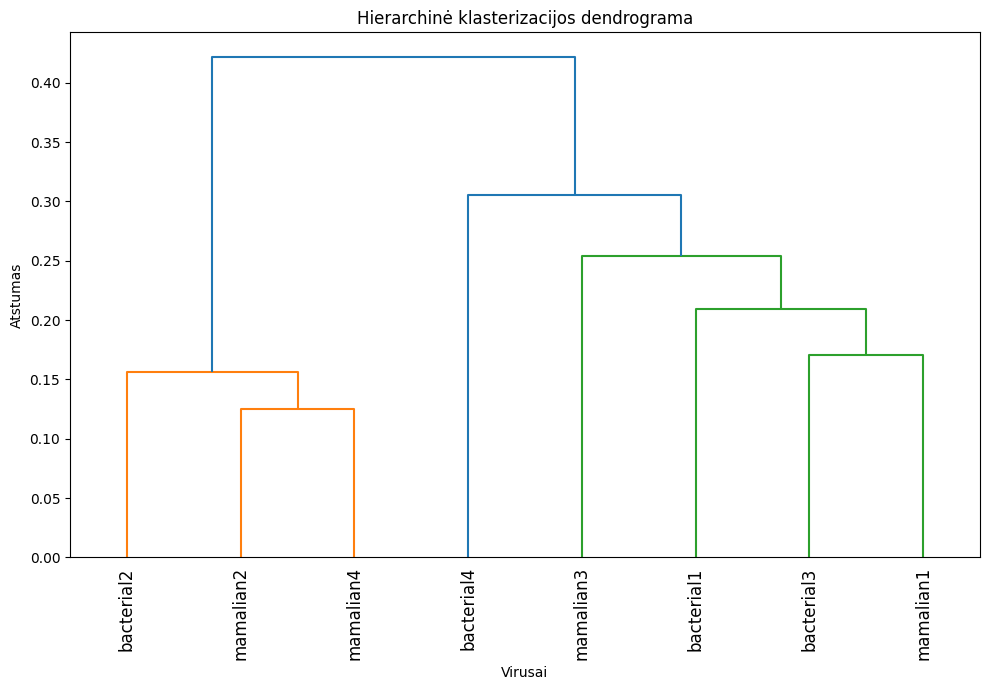

In [118]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

def perform_clustering(distance_matrix, labels, method='average'):
    linkage_matrix = linkage(squareform(distance_matrix), method=method)

    plt.figure(figsize=(10, 7))
    dendrogram(linkage_matrix, labels=labels, leaf_rotation=90)
    plt.title('Hierarchinė klasterizacijos dendrograma')
    plt.xlabel('Virusai')
    plt.ylabel('Atstumas')
    plt.tight_layout()
    plt.show()

perform_clustering(distance_matrix, labels, method='average')
